# Practica: Deteccion de rostros con OpenCV

## Alumno: Paola Rodríguez Medrano 16111696

In [1]:
# Importamos librerias para mostrar imagenes de explicacion
import matplotlib.image as mping
import matplotlib.pyplot as plt

La deteccion de rostros es una tecnica que identifica o localiza rostros humanos en imagenes digitales. Un ejemplo tipico de deteccion de rostros ocurre cuando tomamos fotografias a traves de nuestros telefonos inteligentes, y detecta instantaneamente rostros en la imagen. La deteccion de rostros es diferente del reconocimiento de rostros. La detecciond e rostros detecta simplemente la presencia de rostros en una imagen, mientras que el reconocimiento facial implica identificar de quien es el rostro. En esta practica, solo trataremos con el primero.


La deteccion de rostros se realiza mediante el uso de clasificadores. Un clasificador es escencialmente un algoritmo que decide si una imagen dada es positiva (cara) o negativa (no una cara). Un clasificador necesita ser entrenado en miles de imagenes con y sin caras. Afortunadamente, OpenCV ya tiene dos clasificadores de deteccion de rostros previamente entrenados, que pueden usarse facialmente en un programa. Los dos clasificadores son:


Haar Classifier


Local Binary Pattern(LBP) classifier.


En esta practica, solo discutiremos el clasificador Haar.

### Haar feature-based cascade classifiers

Las caracteristicas tipo Haar son caracteristicas de imagenes digitales utilizadas en el reconocimiento de objetos. Deben su nombre a su similitud intuitiva con las wavelets de Haar y se usaron en el primer detecto facial en tiempo real. Paul Viola y Michael Jones en su articulo titulado "Deteccion rapida de objetos usando una cascada mejorada de caracteristicas simples" utilizaron la idea del clasificador de caracteristicas de Haar basado en las wavelets de Haar. Este clasificador es ampliamente utilizado para tareas como la deteccion de rostros en la industria de la vision por computadora.


El clasificador en casacada de Haar emplea un enfoque de aprendizaje automatico para la deteccion de objetos visuales que es capaz de procesar imagenes extremadamente rapido y lograr altas tasas de deteccion. Esto puede atribuirse a tres razones principales:


1.El clasificador de Haar emplea el concepto "Imagen integral" que permite que las caracteristicas utilizadas por el detector se calculen muy rapidamente.


2.El algortimo de aprendizaje se basa en AdaBoost. Selecciona una pequeña cantidad de caracteristicas importantes de un conjunto grande y ofrece clasificadores altamente eficientes.


3.Los clasificadores mas complejos se combinan para formar una 'cascada' que descarta las regiones no faciales en una imagen, gastando asi mas computo en regiones prometedoras similares a objetos.

### Como funciona el algoritmo en las imagenes en pasos:

### 1. Extraccion de caracteristicas de Haar


Despues de que la enorme cantidad de datos de entrenamiento (en forma de imagenes) se introduce en el sistema, el clasificador comienza extrayendo las caracteristicas de Haar de cada imagen. Las caracteristicas de Haar son una especie de nucleos de convolcion que detectan principalmente si una caracteristica adecuada esta presente en una imagen o no. Algunos ejemplos de caracteristicas de Haar se mencionan a continuacion:

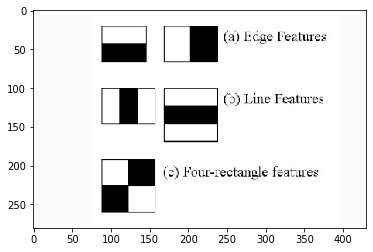

In [2]:
imagen1=mping.imread('imagen1.png')
implot = plt.imshow(imagen1)
plt.show()

Esta caracteristica de Haar son como ventanas y se colocan sobre imagenes para calcular una sola caracteristica. La caracteristica es esencialmente un valor unico obtenido restando la suma de los pixeles debajod e la region blanca y la debajo del negro. El proceso se puede visualizar facilmente en el siguiente ejemplo:

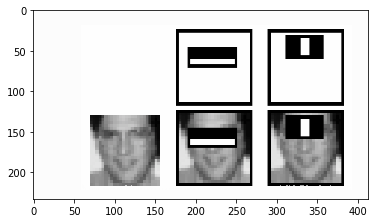

In [3]:
imagen2=mping.imread('imagen2.png')
implot = plt.imshow(imagen2)
plt.show()

Para fines de demostracion, digamos que solo estamos extrayendo dos caracteristicas, por lo tanto, solo tenemos dos ventanas aqui. La primera caracteristica se basa en el punto de que la region del ojo es mas oscura que las mejillas adyacentes y la region de la nariz. La segunda caracteristica se centra en el hecho de que los ojos son algo  mas oscuros en comparacion con el puente de la nariz. Por lo tanto, cuando la ventana caracteristica se mueve sobre los ojos, calculara un solo valor. Este valor se comparara con algun umbraly, si pasa, concluira que hay una ventaja aqui o alguna caracteristica positiva.

### 2. Concepto de "Imagenes integrales

El algoritmo propuesto por Viola Jones utiliza un tamaño de ventana base 24x24, y eso daria como resultado que se calculen mas de 180,000 caracteristicas en esta ventana. ¿Imagina calcular la diferencia de pixeles para todas las funciones? La solucion ideada para este proceso computacionalmente intensivo es optar por el concepto de imagen integral. La imagen integral significa que para encontrar la suma de todos los pixeles debajo de cualquier rectangulo, simplemente necesitamos los cuatro valores de las esquinas.

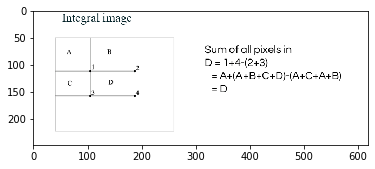

In [4]:
imagen3=mping.imread('imagen3.png')
implot = plt.imshow(imagen3)
plt.show()

Esto significa que, para calcular la suma de pixeles en cualquier ventana de caracteristicas, no necesitamos sumarlos individualmente. Todo lo que necesitamos es calcular la imagen integral usando los 4 valores de las esquinas. El siguiente ejemplo hara que el proceso sea transparente.

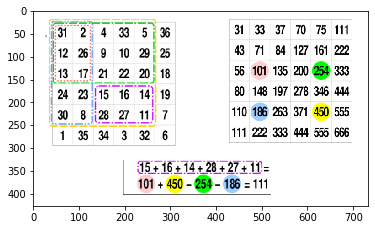

In [5]:
imagen4=mping.imread('imagen4.png')
implot = plt.imshow(imagen4)
plt.show()

### 3. 'Adaboost': para mejorar la precision del clasificador

Como se señalo anteriormente, mas de 180,000 valores de caracteristicas resultan dentro de una ventana 24x24. Sin embargo, no todas las caracteristicas son utiles para identificar una cara. Para seleccionar solo la mejor caracteristica de toda la porcion, se utiliza un algoritmo de aprendizaje automatico llamado Adaboost. Lo que esencialmente hace es que selecciona solo auqellas caracteristicas que ayudan a mejorar la precision del clasificador. Lo hace al construir un clasificador fuerte que es una combinacion lineal de varios clasificadores debiles. Esto reduce drasticamente la cantidad de funciones a alrededor de 6000 de alrededor de 180,000.

### 4. Uso de 'Clasificadores Cascada'

Otra forma en la que Viola Jones se aseguro de que el algoritmo funcione rapidamente es mediante el uso de una cascada de clasificadores. El clasificador en cascada consiste esencialmente en etapas donde cada etapa consiste en un clasificador fuerte. Esto es beneficioso ya que elimina la necesidad de aplicar todas las funciones a la vez en una ventana. Mas bien, agrupa las caracteristicas en ventanas secundarias separadas y el clasificador en cada etapa determina si la ventana secundaria es o no una cara. En caso de que no sea asi, la subventana se descarta junto con las caracteristicas de esa ventana. Si la subventana se mueve mas alla del clasificador, continua a la siguiente etapa donde se aplica la segunda etapa de caracteristicas. El proceso se puede entender con la ayuda del siguiente diagrama:

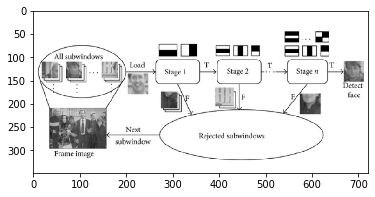

In [6]:
imagen5=mping.imread('imagen5.png')
implot = plt.imshow(imagen5)
plt.show()

### 5. Deteccion de rostros con OpenCV

### Cargando las bibliotecas necesarias

In [7]:
# Importa las bibliotecas necesarias
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

### Cargano imagenes

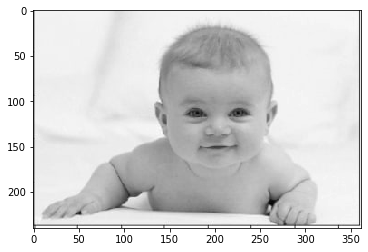

In [8]:
#  Cargando la imagen a probar
test_image = cv2.imread('bebe.jpg')

# Conversión a escala de grises como opencv espera que el detector tome imágenes de escala de grises de entrada
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Mostrando imagen en escala de grises
plt.imshow(test_image_gray, cmap='gray')

Como sabemos que OpenCV carga una imagen en formato BGR, debemos convertirla al formato RGB para poder mostrar sus colores verdaderos. Escribamos una pequeña funcion para eso.

In [9]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Archivos Haar cascade


OpenCV viene con muchos clasificadores de clase previamente entrenados. Por ejemplo, hay clasificadores para sonrisa, ojos, cara, etc. Estos vienen en forma de archivos xml y se encuentran en la carpeta opencv/data/haarcascades/. Sin embargo, para simplificar las cosas, descargamos los archivos XML y los colocamos en la carpeta de datos en el mismo directorio de trabajo que el cuaderno jupyter.

### Carga el clasificador para cara frontal

In [10]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

### Deteccion de rostro


Utilizaremos el modulo detectMultiscale del clasificador. Esta funcion devolvera las coordenadas (posicion x e y mas la altura y el ancho) de las caras detectadas como Rect(x,y,w,h).

In [11]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Imprimamos el no. de caras encontradas
print('Faces found: ', len(faces_rects))

Faces found:  1


Nuestro siguiente paso es recorrer todas las coordenadas que devolvio y dibujar rectangulos a su alrededor usando OpenCV. Dibujaremos un rectangulo verde con un grosor de 2

In [12]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

Finalmente, mostraremos la imagen original en color para ver si la cara se ha detectado correctamente o no.

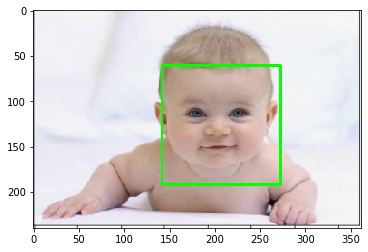

In [13]:
# convierte imagen a RGB y muestra la imagen
plt.imshow(convertToRGB(test_image))

### Creamos una funcion generalizada para todo el proceso de deteccion de rostros

In [14]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # crea una copia de la imagen para evitar cambios en la original.
    image_copy = test_image.copy()
    
    # Convierte la imagen de prueba a escala de grises, ya que el detector de caras opencv espera imágenes en gris
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Aplicando el clasificador haar para detectar caras
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return image_copy

### Probando la funcion en una nueva imagen

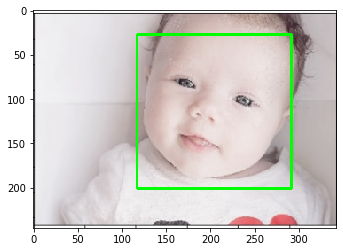

In [15]:
# Cargando la imagen
test_image2 = cv2.imread('bebe2.jpg')

# llama a la función para detectar caras
faces = detect_faces(haar_cascade_face, test_image2)

# Convierte la imagen a RGB y la mostramos
plt.imshow(convertToRGB(faces))